## Temperature Bins Curvature Area PCA
In this file we perform Principal Component Analysis to the dataframes constructed in TempBinsCurveArea.ipynb

In [4]:
import pandas as pd
import numpy as np  
import random
import matplotlib.pyplot as plt
import pickle

Load the various csv and dictionary files created in other notebooks

In [8]:
with open('../Data/train_files.pickle', 'rb') as h:
    train_files = pickle.load(h)

with open('../Data/val_files.pickle', 'rb') as f:
    val_files = pickle.load(f)

with open('DictAreasTrain.pickle', 'rb') as g:
    DictAreasTrain = pickle.load(g)

train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")
val_labels = pd.read_csv("../Data/val_labels.csv",index_col="sample_id")

Let's do PCA on each array in the dictionary to reduce the number of features to train our models. Make a plot of the cumulative explained variance to decide how many components to use for PCA. First we load the dictionary DictAreasTrain

Text(0, 0.5, 'cumulative explained variance')

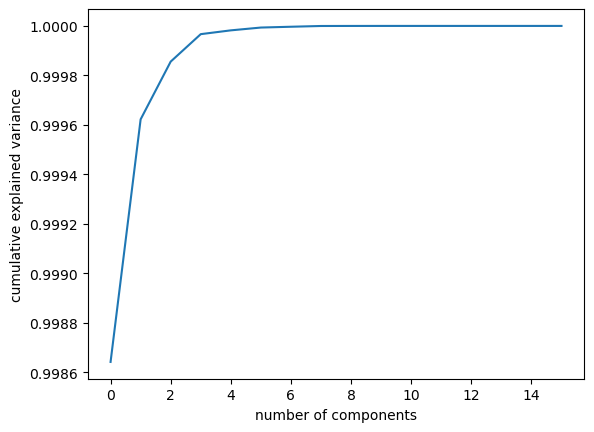

In [10]:
# import PCA
from sklearn.decomposition import PCA

# Try it on one dataframe
pca_df = DictAreasTrain['S0600']

# Fit and make plot of explained variance ratio
principal_components = PCA().fit(pca_df)

# pca = PCA().fit(digits.data)
plt.plot(np.cumsum(principal_components.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


From going through and making plots of a few random dataframes, overall it looks like we can capture most of the data with 3 components. So let's do PCA to 3 components for each dataframe and store that in a csv that can be used for modeling.

<Axes: >

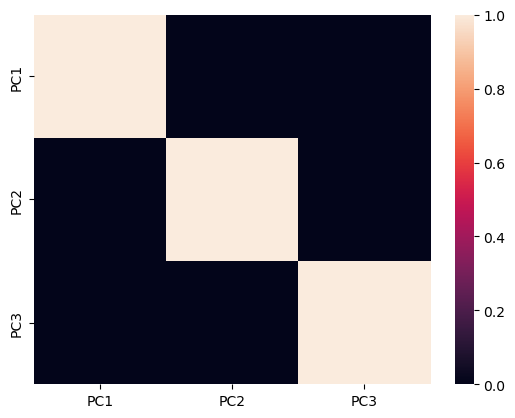

In [21]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
import seaborn as sns

#Test the PCA with 3 components on the above dataframe
scaler = StandardScaler() 
scaled_data = pd.DataFrame(scaler.fit_transform(pca_df)) #scaling the data

n_components = 3

pca = PCA(n_components = n_components)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

# create labels list
columns = []
for i in range(n_components):
    columns.append('PC'+str(i+1))


data_pca = pd.DataFrame(data_pca,columns=columns)
    
sns.heatmap(data_pca.corr())
#data_pca

It looks like there is no correlation between the obtained principal components, so carrying out PCA accomplished our desired objective. Let's do these for each dataframe in the dictionary and output the flattened PCA array for each sample row to CSV.

In [20]:
# Import CSV to write outputs to file for modeling
import csv

# To store the PCA dataframes
PCAareas = {}

# Do PCA on each dataframe in the dictionary
for sample, dataframe in DictAreasTrain.items():
    # Scale the data
    scaler = StandardScaler() 
    scaled_df = pd.DataFrame(scaler.fit_transform(dataframe)) 

    # Carry out PCA with 3 components
    pca = PCA(n_components = 3)
    pca.fit(scaled_df)
    data_pca = pca.transform(scaled_df)
    data_pca = pd.DataFrame(data_pca)
    
   # PCAareas[sample] = data_pca
    flattened_data = data_pca.to_numpy().flatten()

    # Write sample name and flattened data into one row
    with open("temp_bin_PCA_output.csv", 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # Write the data row (values)
        writer.writerow(flattened_data)
  